# Prepare a classification model using SVM for salary data 
Data Description:

    age -- age of a person
    workclass	-- A work class is a grouping of work 
    education	-- Education of an individuals	
    maritalstatus -- Marital status of an individulas	
    occupation	 -- occupation of an individuals
    relationship -- 	
    race --  Race of an Individual
    sex --  Gender of an Individual
    capitalgain --  profit received from the sale of an investment	
    capitalloss	-- A decrease in the value of a capital asset
    hoursperweek -- number of hours work per week	
    native -- Native of an individual
    Salary -- salary of an individual


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
salary_train_data = pd.read_csv('SalaryData_Train.csv')
salary_train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
salary_test_data = pd.read_csv('SalaryData_Test.csv')
salary_test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
salary_train_data.drop(['educationno','capitalgain','capitalloss'], axis = 1, inplace = True)
salary_test_data.drop(['educationno','capitalgain','capitalloss'], axis = 1, inplace = True)

In [5]:
salary_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   maritalstatus  30161 non-null  object
 4   occupation     30161 non-null  object
 5   relationship   30161 non-null  object
 6   race           30161 non-null  object
 7   sex            30161 non-null  object
 8   hoursperweek   30161 non-null  int64 
 9   native         30161 non-null  object
 10  Salary         30161 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


In [6]:
salary_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   maritalstatus  15060 non-null  object
 4   occupation     15060 non-null  object
 5   relationship   15060 non-null  object
 6   race           15060 non-null  object
 7   sex            15060 non-null  object
 8   hoursperweek   15060 non-null  int64 
 9   native         15060 non-null  object
 10  Salary         15060 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


# Exploratory Data Analysis

In [7]:
salary_train_data.describe(include='all')

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
count,30161.000000,30161,30161,30161,30161,30161,30161,30161,30161.000000,30161,30161
unique,NaN,7,16,7,14,6,5,2,NaN,40,2
top,NaN,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,22285,9840,14065,4038,12463,25932,20380,NaN,27504,22653
mean,38.438115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.931269,NaN,NaN
std,13.134830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.980182,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


In [8]:
salary_test_data.describe(include='all')

,age,workclass,education,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
count,15060.000000,15060,15060,15060,15060,15060,15060,15060,15060.000000,15060,15060
unique,NaN,7,16,7,14,6,5,2,NaN,40,2
top,NaN,Private,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,United-States,<=50K
freq,NaN,11021,4943,6990,1992,6203,12970,10147,NaN,13788,11360
mean,38.768327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.951594,NaN,NaN
std,13.380676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.062831,NaN,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,NaN


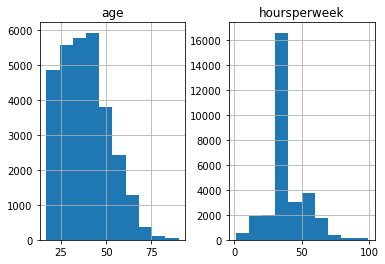

In [9]:
salary_train_data.hist()
plt.show()

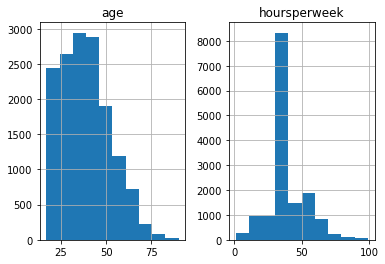

In [10]:
salary_test_data.hist()
plt.show()

In [11]:
salary_train_data['Salary'].value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

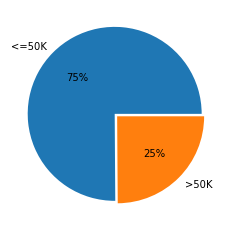

In [15]:
plt.pie(x =salary_train_data['Salary'].value_counts(),labels=['<=50K','>50K'],autopct='%1.0f%%',explode=[0.02,0.02])
plt.show()

In [8]:
salary_test_data['Salary'].value_counts()

 <=50K    11360
 >50K      3700
Name: Salary, dtype: int64

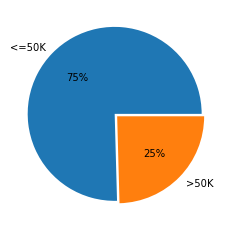

In [16]:
plt.pie(x =salary_test_data['Salary'].value_counts(),labels=['<=50K','>50K'],autopct='%1.0f%%',explode=[0.02,0.02])
plt.show()

## Preprocessing

In [9]:
from sklearn.compose import ColumnTransformer

In [10]:
num_attribs = ['age','hoursperweek']
cat_attribs = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
labels = ['Salary']
full_pipeline = ColumnTransformer([("num", MinMaxScaler(), num_attribs),
                                   ("cat", OneHotEncoder(drop='if_binary'), cat_attribs),
                                   ("tar", OneHotEncoder(drop='if_binary'), labels)
                                  ], sparse_threshold= 0)
data = full_pipeline.fit_transform(salary_train_data)

In [11]:
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.301370,0.397959,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.452055,0.122449,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.287671,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.493151,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.150685,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
x_train = data.drop(98, axis = 1)
y_train = data[98]

In [13]:
num_attribs_t = ['age','hoursperweek']
cat_attribs_t = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
labels_t = ['Salary']
full_pipeline_t = ColumnTransformer([("num", MinMaxScaler(), num_attribs_t),
                                   ("cat", OneHotEncoder(drop='if_binary'), cat_attribs_t),
                                   ("tar", OneHotEncoder(drop='if_binary'), labels_t)
                                  ], sparse_threshold= 0)
data_test = full_pipeline_t.fit_transform(salary_test_data)

In [14]:
data_test = pd.DataFrame(data_test)
data_test.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.109589,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.287671,0.500000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.150685,0.397959,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.369863,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.232877,0.295918,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [15]:
x_test = data_test.drop(98, axis = 1)
y_test = data_test[98]

# Guassian Classifier

In [16]:
clf_gnb = GaussianNB()

In [17]:
clf_gnb.fit(x_train, y_train)

GaussianNB()

In [18]:
confusion_matrix(y_train, clf_gnb.predict(x_train))

array([[10012, 12641],
       [  512,  6996]], dtype=int64)

## Evaluation

#### Evaluate the model on the test data

In [19]:
y_pred_test_gnb = clf_gnb.predict(x_test)

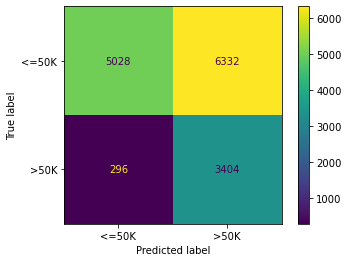

In [20]:
cmp_gnb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_gnb),
                             display_labels=["<=50K", ">50K"]
                            )
cmp_gnb.plot()

In [21]:
print(classification_report(y_test, y_pred_test_gnb, target_names = ["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.94      0.44      0.60     11360
        >50K       0.35      0.92      0.51      3700

    accuracy                           0.56     15060
   macro avg       0.65      0.68      0.55     15060
weighted avg       0.80      0.56      0.58     15060



# MultinomialNB Classifier

In [22]:
clf_mnb = MultinomialNB()

In [23]:
clf_mnb.fit(x_train, y_train)

MultinomialNB()

In [24]:
confusion_matrix(y_train, clf_mnb.predict(x_train))

array([[18508,  4145],
       [ 2001,  5507]], dtype=int64)

In [25]:
y_pred_test_mnb = clf_mnb.predict(x_test)

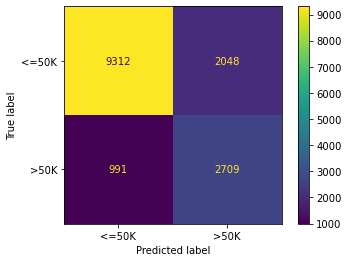

In [26]:
cmp_mnb = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_test_mnb),
                             display_labels=["<=50K", ">50K"]
                            )
cmp_mnb.plot()

In [27]:
print(classification_report(y_test, y_pred_test_mnb, target_names = ["<=50K", ">50K"]))

              precision    recall  f1-score   support

       <=50K       0.90      0.82      0.86     11360
        >50K       0.57      0.73      0.64      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.78      0.75     15060
weighted avg       0.82      0.80      0.81     15060

